# Predicting survivors of the Titanic Disaster with ML

In [ ]:
# import libraries

import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import datasets

df_train = pd.read_csv('data/train.csv', header = 0, dtype={'Age': np.float64})
df_test  = pd.read_csv('data/test.csv' , header = 0, dtype={'Age': np.float64})
df = df_train.append(df_test, ignore_index=True)


# Exploratory Analysis

In the image below there is a description of all the columns of the datasets

<img src='data/data_description.JPG'>

In [ ]:
df.sample(10)

PassengerId  Survived  Pclass  \
589           590       0.0       3   
392           393       0.0       3   
462           463       0.0       1   
286           287       1.0       3   
306           307       1.0       1   
470           471       0.0       3   
22             23       1.0       3   
1042         1043       NaN       3   
559           560       1.0       3   
1103         1104       NaN       2   

                                              Name     Sex   Age  SibSp  \
589                            Murdlin, Mr. Joseph    male   NaN      0   
392                   Gustafsson, Mr. Johan Birger    male  28.0      2   
462                              Gee, Mr. Arthur H    male  47.0      0   
286                        de Mulder, Mr. Theodore    male  30.0      0   
306                        Fleming, Miss. Margaret  female   NaN      0   
470                              Keefe, Mr. Arthur    male   NaN      0   
22                     McGowan, Miss. Anna "Annie"  female  15.0      0   
1042                          Matinoff, Mr. Nicola    male   NaN      0   
559   de Messemaeker, Mrs. Guillaume Joseph (Emma)  female  36.0      1   
1103                     Deacon, Mr. Percy William    male  17.0      0   

      Parch        Ticket      Fare Cabin Embarked  
589       0    A./5. 3235    8.0500   NaN        S  
392       0       3101277    7.9250   NaN        S  
462       0        111320   38.5000   E63        S  
286       0        345774    9.5000   NaN        S  
306       0         17421  110.8833   NaN        C  
470       0        323592    7.2500   NaN        S  
22        0        330923    8.0292   NaN        Q  
1042      0        349255    7.8958   NaN        C  
559       0        345572   17.4000   NaN        S  
1103      0  S.O.C. 14879   73.5000   NaN        S

In [ ]:
df_train.profile_report()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Visualization of survival rate

Visualizing the survival rate based on some features can help us to have a better understanding of which features influenced most the chance of survival

**Survival Rate based on Sex**

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

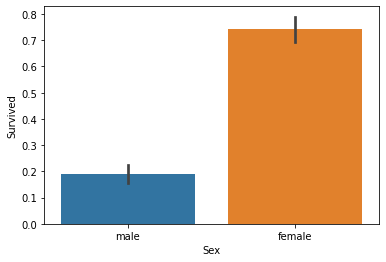

In [ ]:
sns.barplot(x="Sex", y="Survived", data=df_train)

Female has a lot higher rate of survival.

**Survival Rate based on Ticket Class**

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

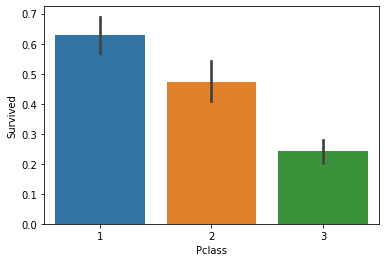

In [ ]:
sns.barplot(x="Pclass", y="Survived", data=df_train)

People with ticket of upper classes have higher rate of survival.

**Survival Rate based on sibilings or spouse**


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

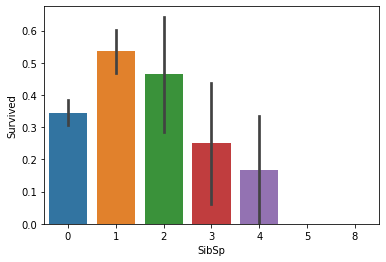

In [ ]:
sns.barplot(x="SibSp", y="Survived", data=df_train)

The survival rate is pretty high for people with less sibiling or spouse. We can check if this trend goes on with parent/children.

**Survival Rate based on parent/children**

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

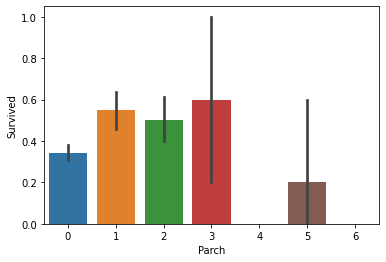

In [ ]:
sns.barplot(x="Parch", y="Survived", data=df_train)

Evaluating those plot with the insight of the previous one, we can think that people traveling alone or in large families have lesser chance of survive.

# Handling NaNs

There are some columns with missing value. We need to handle them in order to get the better results from our models.

**Cabin Column**

In [ ]:
df['Cabin_Flag'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
df.head(2)

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  Cabin_Flag  
0      0  A/5 21171   7.2500   NaN        S           0  
1      0   PC 17599  71.2833   C85        C           1

In [ ]:
df['Cabin'].fillna('Missing',inplace=True)
df['Cabin']=df['Cabin'].astype(str).str[0]
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
mean_ordinals = df.groupby(['Cabin'])['Survived'].mean().sort_values().to_dict()
print(mean_ordinals)
df['Cabin_mean_encode']=df['Cabin'].map(mean_ordinals)

{'T': 0.0, 'M': 0.29985443959243085, 'A': 0.4666666666666667, 'G': 0.5, 'C': 0.5932203389830508, 'F': 0.6153846153846154, 'B': 0.7446808510638298, 'E': 0.75, 'D': 0.7575757575757576}


In [ ]:
df_train = df[df['Survived'].notnull()]
df_test = df[df['Survived'].isnull()]

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age


df_train['Age_new'] = df_train[['Age','Pclass']].apply(impute_age,axis=1)
df_test['Age_new'] = df_test[['Age','Pclass']].apply(impute_age,axis=1)

**Embarked Column**

The "Embarked" column has only 2 nans so we can fill them with the most common value


In [ ]:
print(df_train['Embarked'].value_counts())

# the most common value is S (for Southampton), so we replace the NaNs with 'S'

df_train = df_train.fillna({"Embarked": "S"})
df_test = df_test.fillna({"Embarked": "S"})

S    644
C    168
Q     77
Name: Embarked, dtype: int64


**Age column**

Since 'Age' has more NaNs, we need to do a bit more of investigation and work there

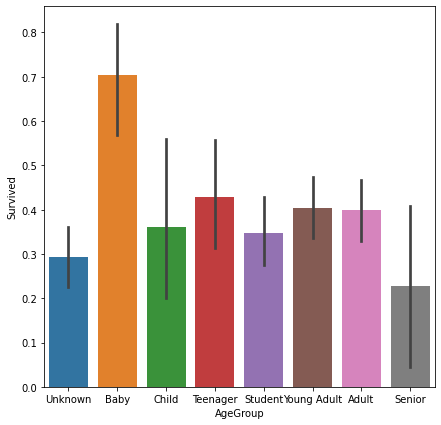

In [ ]:
#sort the ages into groups

df_train["Age"] = df_train["Age"].fillna(-0.5)
df_test["Age"] = df_test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
df_train['AgeGroup'] = pd.cut(df_train["Age"], bins, labels = labels)
df_test['AgeGroup'] = pd.cut(df_test["Age"], bins, labels = labels)

#plot the survival rate of every age group
plt.figure(figsize=(7,7))
sns.barplot(x="AgeGroup", y="Survived", data=df_train)
plt.show()

We can see that age as a high impact on survival rate, so it's better to think about the best ways to fill the NaNs in that column.<br>
One thing we can do is extract the title from the name column and assign it to a new column.

In [ ]:
df_train['Title'] = df_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_test['Title'] = df_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_train['Title'] = df_train['Title'].replace({"Capt": "Officer",
        "Col": "Officer",
        "Major": "Officer",
        "Jonkheer": "Royalty",
        "Don": "Royalty",
        "Dona": "Royalty",
        "Sir": "Royalty",
        "Dr": "Officer",
        "Rev": "Officer",
        "the Countess": "Royalty",
        "Mme": "Mrs",
        "Mlle": "Miss",
        "Ms": "Mrs",
        "Mr": "Mr",
        "Mrs": "Mrs",
        "Miss": "Miss",
        "Master": "Master",
        "Lady": "Royalty"})

df_test['Title'] = df_test['Title'].replace({"Capt": "Officer",
        "Col": "Officer",
        "Major": "Officer",
        "Jonkheer": "Royalty",
        "Don": "Royalty",
        "Dona": "Royalty",
        "Sir": "Royalty",
        "Dr": "Officer",
        "Rev": "Officer",
        "the Countess": "Royalty",
        "Mme": "Mrs",
        "Mlle": "Miss",
        "Ms": "Mrs",
        "Mr": "Mr",
        "Mrs": "Mrs",
        "Miss": "Miss",
        "Master": "Master",
        "Lady": "Royalty"})

In [ ]:
master_ages = list(df_test.loc[df_test['Title'] == 'Master']['Age'])
officer_ages = list(df_test.loc[df_test['Title'] == 'Officer']['Age'])
royalty_ages = list(df_test.loc[df_test['Title'] == 'Royalty']['Age'])
mrs_ages = list(df_test.loc[df_test['Title'] == 'Mrs']['Age'])
miss_ages = list(df_test.loc[df_test['Title'] == 'Miss']['Age'])
mr_ages = list(df_test.loc[df_test['Title'] == 'Mr']['Age'])

print(f'Ages for people sharing Master title: {master_ages}')
print(f'Ages for people sharing Officer title: {officer_ages}')
print(f'Ages for people sharing Royalty title: {royalty_ages}')
print(f'Ages for people sharing Mrs title: {mrs_ages}')
print(f'Ages for people sharing Miss title: {miss_ages}')
print(f'Ages for people sharing Mr title: {mr_ages}')

Ages for people sharing Master title: [9.0, 10.0, 13.0, 6.0, 2.0, 13.0, 7.0, 11.5, 8.0, 6.0, 0.33, -0.5, 0.75, 0.83, -0.5, -0.5, 14.5, 5.0, 6.0, 13.0, -0.5]
Ages for people sharing Officer title: [53.0, 30.0, 41.0, 47.0, 53.0]
Ages for people sharing Royalty title: [39.0]
Ages for people sharing Mrs title: [47.0, 22.0, 18.0, 23.0, 47.0, 24.0, 45.0, -0.5, 48.0, 33.0, -0.5, 30.0, 45.0, 60.0, 36.0, -0.5, 60.0, 55.0, -0.5, 22.0, 27.0, 76.0, 43.0, 16.0, 63.0, 29.0, 35.0, -0.5, 23.0, 36.0, 26.0, 26.0, -0.5, 36.0, 64.0, 18.0, 27.0, -0.5, 60.0, 50.0, 22.0, 53.0, -0.5, 48.0, 55.0, 45.0, 22.0, 29.0, -0.5, 29.0, 26.0, 64.0, 45.0, 55.0, 48.0, 19.0, 58.0, 38.0, 45.0, 59.0, 30.0, 24.0, 31.0, 25.0, -0.5, 45.0, 54.0, -0.5, 19.0, 51.0, 18.0, 48.0, 37.0]
Ages for people sharing Miss title: [30.0, 27.0, 22.0, -0.5, 21.0, 20.0, 28.0, 36.0, 22.0, 18.0, 24.0, 29.0, 35.0, 24.0, 27.0, 18.0, 20.0, -0.5, 36.0, 18.5, 1.0, 12.0, 17.0, -0.5, 23.0, 10.0, 33.0, 29.0, 23.0, -0.5, 26.0, 22.0, 15.0, 20.0, 21.0, -0.5, 1

We can see that people sharing the same title tend to fall into the same age range, so we can fill the NaNs for the ages based on the mean value of the respective title group

In [ ]:
df_test.groupby('Title')['Age'].mean().round()

Title
Master      6.0
Miss       18.0
Mr         24.0
Mrs        33.0
Officer    45.0
Royalty    39.0
Name: Age, dtype: float64

In [ ]:
df_test.loc[(df_test['Age'] == -0.5) & (df_test['Title']=='Master'),'Age'] = 6
df_test.loc[(df_test['Age'] == -0.5) & (df_test['Title']=='Miss'),'Age'] = 18
df_test.loc[(df_test['Age'] == -0.5) & (df_test['Title']=='Mr'),'Age'] = 24
df_test.loc[(df_test['Age'] == -0.5) & (df_test['Title']=='Mrs'),'Age'] = 33
df_test.loc[(df_test['Age'] == -0.5) & (df_test['Title']=='Officer'),'Age'] = 45
df_test.loc[(df_test['Age'] == -0.5) & (df_test['Title']=='Royalty'),'Age'] = 39

df_train.loc[(df_train['Age'] == -0.5) & (df_train['Title']=='Master'),'Age'] = 6
df_train.loc[(df_train['Age'] == -0.5) & (df_train['Title']=='Miss'),'Age'] = 18
df_train.loc[(df_train['Age'] == -0.5) & (df_train['Title']=='Mr'),'Age'] = 24
df_train.loc[(df_train['Age'] == -0.5) & (df_train['Title']=='Mrs'),'Age'] = 33
df_train.loc[(df_train['Age'] == -0.5) & (df_train['Title']=='Officer'),'Age'] = 45
df_train.loc[(df_train['Age'] == -0.5) & (df_train['Title']=='Royalty'),'Age'] = 39

# Label Encoding

We encode categorical values as numbers to allow our models to work better.

**Encoding Male and Female in Sex column as 0 and 1**

In [ ]:
df_train.Sex.replace(to_replace=dict(female=1, male=0), inplace=True)
df_test.Sex.replace(to_replace=dict(female=1, male=0), inplace=True)

**Encoding boarding port in Embarked column as 0, 1, 2**

In [ ]:
df_train.Embarked.replace(to_replace=dict(S=0,C=1,Q=2), inplace=True)
df_test.Embarked.replace(to_replace=dict(S=0,C=1,Q=2), inplace=True)

# Feature Choosing

To train a machine learning model we have to choose the most relevant feature in the datasets.

In [ ]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin  Embarked  Cabin_Flag  Cabin_mean_encode  \
0         A/5 21171   7.2500     M         0           0           0.299854   
1          PC 17599  71.2833     C         1           1           0.593220   
2  STON/O2. 3101282   7.9250     M         0           0           0.299854   
3            113803  53.1000     C         0           1           0.593220   
4            373450   8.0500     M         0           0           0.299854   

      AgeGroup Title  
0      Student    Mr  
1        Adult   Mrs  
2  Young Adult  Miss  
3  Young Adult   Mrs  
4  Young Adult    Mr

'Cabin' and 'Cabin_Flag' can be dropped since we summarized them in 'Cabin_mean_encode'.<br>
'Ticket' gives no particular information and can be dropped.<br>
'PassengerID' and 'Name' will have no influence on the prediction and can be dropped.<br>
'AgeGroup' and 'Title' were used to find the missing age values so they can be dropped.<br>
'Survived' is the target of the prediction, so it must be dropped from the features.

In [ ]:
X = df_train.drop(['Cabin', 'Cabin_Flag', 'Ticket', 'PassengerId', 'Name', 'Survived', 'AgeGroup', 'Title', 'Cabin_mean_encode', 'Age_new'], axis=1) #'Age'
X

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Age_new
0         3    0  22.0      1      0   7.2500         0     22.0
1         1    1  38.0      1      0  71.2833         1     38.0
2         3    1  26.0      0      0   7.9250         0     26.0
3         1    1  35.0      1      0  53.1000         0     35.0
4         3    0  35.0      0      0   8.0500         0     35.0
..      ...  ...   ...    ...    ...      ...       ...      ...
886       2    0  27.0      0      0  13.0000         0     27.0
887       1    1  19.0      0      0  30.0000         0     19.0
888       3    1  18.0      1      2  23.4500         0     18.0
889       1    0  26.0      0      0  30.0000         1     26.0
890       3    0  32.0      0      0   7.7500         2     32.0

[891 rows x 8 columns]

We can check for correlation between those features

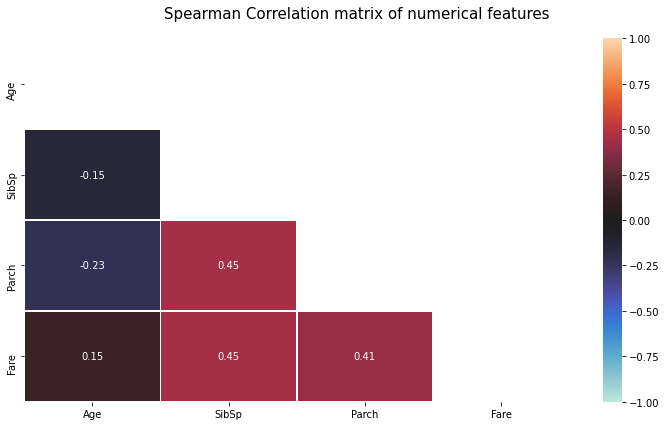

In [ ]:
corr = X[['Age','SibSp','Parch','Fare']].corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, linewidths=.5, annot=True)

fig.suptitle('Spearman Correlation matrix of numerical features', fontsize=15)
ax.text(0.77, 0.2, '', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)

fig.tight_layout()

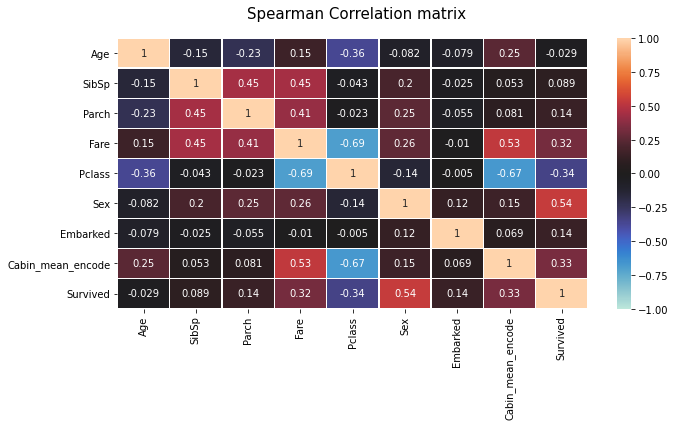

In [ ]:
corre = df_train[['Age','SibSp','Parch','Fare', 'Pclass', 'Sex', 'Embarked', 'Cabin_mean_encode', 'Survived']].corr(method='spearman')

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 6))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corre, vmin=-1, vmax=1, center=0, linewidths=.5, annot=True)

fig.suptitle('Spearman Correlation matrix', fontsize=15)
ax.text(0.77, 0.2, '', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)

fig.tight_layout()


# Models

To test our model before making submission, we define our y as the 'Survived' column of the test dataset and do a split for train/test.

In [ ]:
X = df_train.drop(['Cabin', 'Cabin_Flag', 'Ticket', 'PassengerId', 'Name', 'Survived', 'AgeGroup', 'Title', 'Cabin_mean_encode', 'Age_new'], axis=1) #'Age'
y = df_train['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)

# scaling Xs

from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

## Try LDA

In [ ]:
X = df_train.drop(['Cabin', 'Cabin_Flag', 'Ticket', 'PassengerId', 'Name', 'Survived', 'AgeGroup', 'Title', 'Cabin_mean_encode', 'Age_new'], axis=1) #'Age'
y = df_train['Survived']

In [ ]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [ ]:
min(X.shape[1], 2 - 1)

1

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X,y)
a=zip(range(0,4), lda.explained_variance_ratio_)
df_comp = pd.DataFrame(a, columns=['n_components', 'explaine_variance_ratio_'])
print(df_comp)

   n_components  explaine_variance_ratio_
0             0                       1.0


In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param = {'n_estimators' : [100, 200, 300, 400, 500],
        'criterion': ['gini', 'entropy'],
        'max_depth': ['None', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'min_samples_split': [2, 3, 4],
        'bootstrap': ['True', 'False'],
        'random_state': [42, 0, 13]}

forest = RandomForestClassifier()

forest_random = RandomizedSearchCV(forest, param, cv=5)

forest_random.fit(X_lda, y)

print(f"Best Random Forest Parameters: {forest_random.best_params_}")
print(f"Best score is {forest_random.best_score_}")

Best Random Forest Parameters: {'random_state': 13, 'n_estimators': 100, 'min_samples_split': 4, 'max_depth': 2, 'criterion': 'entropy', 'bootstrap': 'False'}
Best score is 0.8114430983616849


In [ ]:
# noticed a NaN in fare, correting it here

df_test['Fare'] = df_test['Fare'].fillna(df_test.Fare.mean())

In [ ]:
df_test.isnull().sum()


PassengerId            0
Survived             418
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0
Cabin_Flag             0
Cabin_mean_encode      0
AgeGroup               0
Title                  0
dtype: int64

In [ ]:
Xtest = df_test[['Pclass','Sex','SibSp','Parch','Fare','Embarked', 'Age_new']]

ytest_pred = forest_random.predict(Xtest)
(ytest_pred)

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

In [ ]:
# creating submission file for random forest

ids = df_test['PassengerId']
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': ytest_pred})
output['Survived'] = output['Survived'].astype(int)



output.to_csv('submission_3.csv', index=False)

**SVC**

In [ ]:
from sklearn.svm import SVC

svc = SVC()

params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree': list(range(1, 10)),
        'max_iter': [-1],
        'gamma': ['scale', 'auto']}

svc_random = RandomizedSearchCV(svc, params)

svc_random.fit(X, y)

print(f"Best SVC Parameters: {svc_random.best_params_}")
print(f"Best score is {svc_random.best_score_}")

Best SVC Parameters: {'max_iter': -1, 'kernel': 'linear', 'gamma': 'scale', 'degree': 1}
Best score is 0.7878601468834348


**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

paramss = {'loss': ['deviance', 'exponential'],
        'n_estimators' : [100, 200, 300, 400, 500],
        'criterion': ['friedman_mse', 'mse', 'mae'],
        'max_depth': ['None', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'min_samples_split': [2, 3, 4],
        'random_state': [42, 0, 13],
        'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01]}

gbc_random = RandomizedSearchCV(gbc, paramss)

gbc_random.fit(X_lda, y)

print(f"Best GBC Parameters: {gbc_random.best_params_}")
print(f"Best score is {gbc_random.best_score_}")

Best GBC Parameters: {'random_state': 42, 'n_estimators': 200, 'min_samples_split': 4, 'max_depth': 3, 'loss': 'exponential', 'learning_rate': 0.01, 'criterion': 'mae'}
Best score is 0.812560416797439


In [ ]:
ytest_pred_gbc = forest_random.predict(Xtest)
(ytest_pred_gbc)
output_gbc = pd.DataFrame({ 'PassengerId' : ids, 'Survived': ytest_pred})
output_gbc['Survived'] = output_gbc['Survived'].astype(int)



output.to_csv('submission_gbc.csv', index=False)

**AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

paramsss = {'n_estimators' : [50, 100, 200, 300, 400, 500],
            'algorithm': ['SAMME', 'SAMME.R'],
            'random_state': [42, 0, 13]}

ada_random = RandomizedSearchCV(ada, paramsss)

ada_random.fit(X_lda, y)

print(f"Best AdaBoost Parameters: {ada_random.best_params_}")
print(f"Best score is {ada_random.best_score_}")

Best AdaBoost Parameters: {'random_state': 42, 'n_estimators': 500, 'algorithm': 'SAMME'}
Best score is 0.812560416797439


**Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()

gaussian.fit(X, y)
gaussian.score(X, y)

0.7912457912457912

#### Catboost classifier

In [ ]:
!pip install catboost

     |████████████████████████████████| 65.7 MB 94.2 MB/s 
     |████████████████████████████████| 13.2 MB 66.6 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=e5d8601922af4ba9ce56a98e54ecf056d26da70b628e3abaf6324596b0236231
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
from catboost import CatBoostClassifier


In [ ]:
X.dtypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [ ]:
X['Pclass']=X['Pclass'].astype('category')
X['Sex']=X['Sex'].astype('category')
X['SibSp']=X['SibSp'].astype('category')
X['Parch']=X['Parch'].astype('category')

In [ ]:
X.dtypes

Pclass      category
Sex         category
Age          float64
SibSp       category
Parch       category
Fare         float64
Embarked       int64
dtype: object

In [ ]:
cat_features=X[['Pclass','Sex','SibSp','Parch']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,random_state =42)

clf = CatBoostClassifier(
    iterations=50,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)

clf.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))